In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

bats = pd.read_csv("moneyball/data/Batting.csv")

In [3]:
bats = bats[bats.yearID == 1990]

In [4]:
bats = bats[bats.G > 10]


In [5]:
bats["OBP_num"] = bats.H + bats.BB + bats.HBP
bats["OBP_den"] = bats.AB + bats.BB + bats.HBP + bats.SF
bats["OBP"] = bats.OBP_num / bats.OBP_den

In [6]:
salaries = pd.read_csv("moneyball/data/Salaries.csv")

In [7]:
salaries = salaries[salaries.yearID == 1990]

In [8]:
merged_data = pd.merge(bats, salaries, how="inner", left_on="playerID", right_on="playerID")

In [9]:
merged_data["$ BALL"] = merged_data.OBP / merged_data.salary * 1000000
merged_data.index = merged_data["playerID"]

In [10]:
presentation = merged_data[["$ BALL", "OBP", "salary"]]

In [11]:
best_players = presentation.sort(["$ BALL"], ascending=False).dropna()

In [12]:
positions = pd.read_csv("moneyball/data/Appearances.csv")

In [13]:
positions = positions[positions.yearID == 1990]

In [14]:
best_player_by_position = pd.merge(best_players, positions, how="inner", left_index=True, right_on="playerID")

In [15]:
best_player_by_position.index = best_player_by_position.playerID

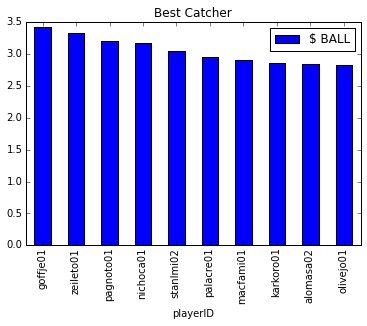

In [16]:
best_catcher = best_player_by_position[best_player_by_position.G_c > 10]
best_catcher = best_catcher[["$ BALL", "OBP", "salary", "G_c"]]

best_catcher[0:10].plot(kind="bar", y=["$ BALL"], title="Best Catcher")

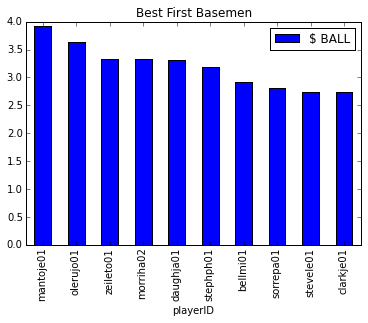

In [17]:
best_first_base = best_player_by_position[best_player_by_position.G_1b > 10]
best_first_base = best_first_base[["$ BALL", "OBP", "salary", "G_1b"]]

best_first_base[0:10].plot(kind="bar", y=["$ BALL"], title="Best First Basemen")

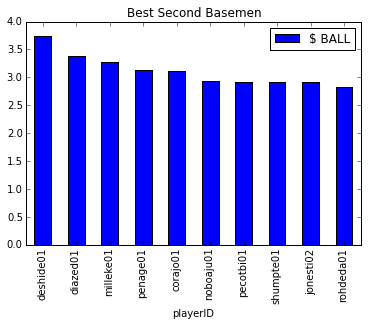

In [18]:
best_second_base = best_player_by_position[best_player_by_position.G_2b > 10]
best_second_base = best_second_base[["$ BALL", "OBP", "salary", "G_2b"]]

best_second_base[0:10].plot(kind="bar", y=["$ BALL"], title="Best Second Basemen")

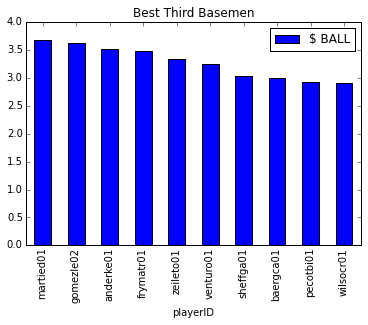

In [19]:
best_third_base = best_player_by_position[best_player_by_position.G_3b > 10]
best_third_base = best_third_base[["$ BALL", "OBP", "salary", "G_3b"]]

best_third_base[0:10].plot(kind="bar", y=["$ BALL"], title="Best Third Basemen")

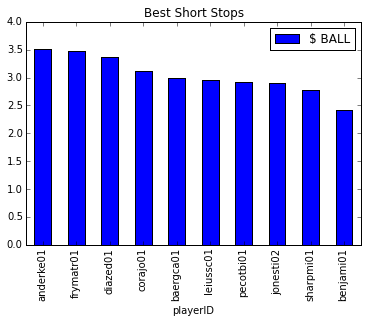

In [20]:
best_short_stop = best_player_by_position[best_player_by_position.G_ss > 10]
best_short_stop = best_short_stop[["$ BALL", "OBP", "salary", "G_ss"]]

best_short_stop[0:10].plot(kind="bar", y=["$ BALL"], title="Best Short Stops")

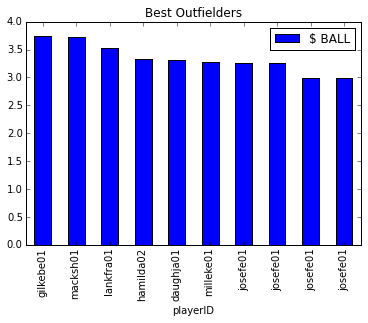

In [21]:
best_outfielders = best_player_by_position[best_player_by_position.G_of > 10]
best_outfielders = best_outfielders[["$ BALL", "OBP", "salary", "G_of"]]

best_outfielders[0:10].plot(kind="bar", y=["$ BALL"], title="Best Outfielders")

In [22]:
DreamTeam = pd.concat([best_catcher.head(1), best_first_base.head(1), best_second_base.head(1), best_third_base.head(1), best_short_stop.head(1), best_outfielders.head(3)])

,$ BALL,G_1b,G_2b,G_3b,G_c,G_of,G_ss,OBP,salary
playerID,,,,,,,,,
goffje01,3.428571,NaN,NaN,NaN,38,NaN,NaN,0.342857,100000
mantoje01,3.917526,25,NaN,NaN,NaN,NaN,NaN,0.391753,100000
deshide01,3.747811,NaN,128,NaN,NaN,NaN,NaN,0.374781,100000
martied01,3.677667,NaN,NaN,143,NaN,NaN,NaN,0.397188,108000
anderke01,3.518350,NaN,NaN,NaN,NaN,NaN,29,0.369427,105000
gilkebe01,3.750000,NaN,NaN,NaN,NaN,18,NaN,0.375000,100000
macksh01,3.732675,NaN,NaN,NaN,NaN,109,NaN,0.391931,105000
lankfra01,3.525180,NaN,NaN,NaN,NaN,35,NaN,0.352518,100000


In [23]:
best_catcher.head(1)

,$ BALL,OBP,salary,G_c
playerID,,,,
goffje01,3.428571,0.342857,100000,38
